sigma = 0.2
gamma = 0.6211180124223602
beta = 1.7018633540372672
R0 = 2.74
Initial population [S, E, I, R] =  [9.999e+03 0.000e+00 1.000e+00 0.000e+00]
Days to reach 200: 31.60000000000018


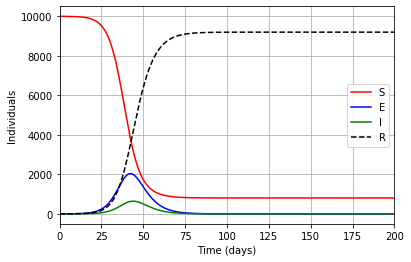

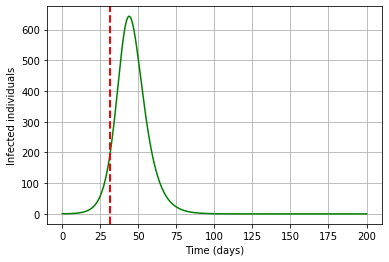

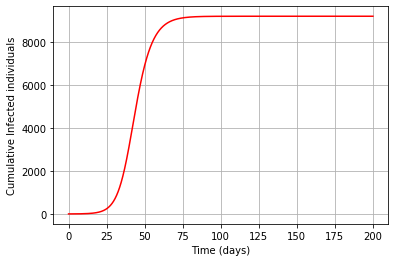

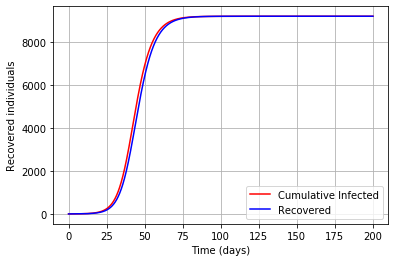

In [1]:
# Bruno Vieira Ribeiro - SEIR for COVID-19 numerical simulation
# IFB - 2020

# x[] -> S,E,I,R

import numpy as np
import matplotlib.pyplot as plt
# import mpld3
# mpld3.enable_notebook()

# Defines functions for this project
from funcs import *

    
#Main body of algorithm:

            # Data parameters:
# t_inc (incubation time = 5 days (avg) )
# t_inf (infectious time = 1.61 day (avg) )
# R0 = basic reproduction number (average of individuals infected by an infected individual during infectation)
# R0 approx 2.74
# mor: Mortalitiy in %

t_inc = 5.0
t_inf = 1.61
R0 = 2.74
mor = 1.0

            # Equation parameters
# Parameters in F: beta, sigma, gamma

sigma = 1.0/t_inc
gamma = 1.0/t_inf
beta = R0/t_inf

print(40*"=")
print(f"sigma = {sigma}")
print(f"gamma = {gamma}")
print(f"beta = {beta}")
print(f"R0 = {R0}")
            # Simulation parameters
# time parameters given in days
# population can be rescaled depending on location

dt = 0.1
t_max = 200.0

# Choose n=4 for the SEIR model (intend to add more eqs to model)
n = 4

# Maximum number of infecteds to start quarantine
max_inf = 200
#reach = False # flag to check first hit on max_inf infected

            # Setting intitial conditions
# xa[] = [S0 , E0, I0, R0]
# I0 = 1/eps
# eps = 1/city population

# Change this line to account for real data:
city_pop = 10000


# eps = 1.0/city_pop
eps = 1

xa = np.array([city_pop-eps, 0.0, eps, 0.0])
#x_seir = np.zeros(n)


print(40*'=')
print("Initial population [S, E, I, R] = ", xa)
            # Setting time counter and time arrays

# These are for plotting and data purposes
t = 0
time = np.array(t)
S = np.array(xa[0])
E = np.array(xa[1])
I = np.array(xa[2])
R = np.array(xa[3])

[Q_start, time, S, E, I, R] = time_loop(t_max, dt, xa, n, beta, sigma, gamma, city_pop, max_inf,
             S, E, I, R, reach = False)


plt.plot(time, S, 'r-')
plt.plot(time, E, 'b-')
plt.plot(time, I, 'g-')
plt.plot(time, R, 'k--')
plt.xlim(0,200)
plt.xlabel('Time (days)')
plt.ylabel('Individuals')
plt.grid()
plt.legend(["S", "E", "I", "R"], loc='best')
plt.show()

plt.plot(time, I, 'g-')
plt.axvline(x = Q_start, linewidth=2, color='r', ls='--')
plt.xlabel('Time (days)')
plt.ylabel('Infected individuals')
plt.grid()
plt.show()

plt.plot(time, I+R, 'r-')
plt.xlabel('Time (days)')
plt.ylabel('Cumulative Infected individuals')
plt.grid()
plt.show()

plt.plot(time, I+R, 'r-')
plt.plot(time, R, 'b-')
plt.legend(["Cumulative Infected", "Recovered"], loc='best')
plt.xlabel('Time (days)')
plt.ylabel('Recovered individuals')
plt.grid()
plt.show()


Days to reach 200: 44.50000000000036
Days to reach 200: 85.29999999999943


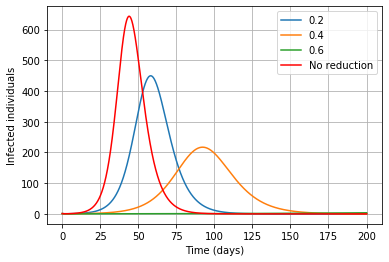

In [2]:
# Simple reduction in R0 and running again

r = 0.2
names = []
while r < 0.7:

    xa = np.array([city_pop-eps, 0.0, eps, 0.0])

    t=0
    time = np.array(t)
    S_r = np.array(xa[0])
    E_r = np.array(xa[1])
    I_r = np.array(xa[2])
    R_r = np.array(xa[3])

    # # Remember: beta = R0/t_inf
    # Reduction in R0 -> reduction in beta
    # Percentage of reduction in R0 during quarantine

    beta_red = (1-r)*beta

    [Q_start_r, time, S_r, E_r, I_r, R_r] = time_loop(t_max, dt, xa, n, beta_red, sigma, gamma, city_pop, max_inf,
                 S_r, E_r, I_r, R_r, reach = False)

    plt.plot(time, I_r)
    names.append("{:.1f}".format(r))
    r+= 0.2

names.append("No reduction")
plt.plot(time, I, 'r-')
plt.legend(names, loc='best')
plt.xlabel('Time (days)')
plt.ylabel('Infected individuals')
plt.grid()
plt.show()

Initial population [S, E, I, R] =  [9.999e+03 0.000e+00 1.000e+00 0.000e+00]


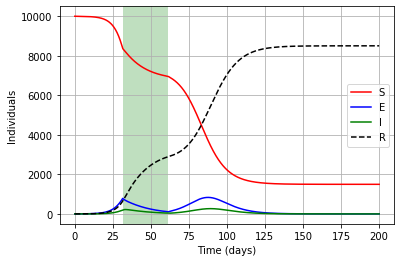

In [3]:
# Quarantine period
t_max_Q = 200
xa = np.array([city_pop-eps, 0.0, eps, 0.0])
x_seir = np.zeros(n)


print(40*'=')
print("Initial population [S, E, I, R] = ", xa)
            # Setting time counter and time arrays

# These are for plotting and data purposes
t=0
time = np.array(t)
S_Q = np.array(xa[0])
E_Q = np.array(xa[1])
I_Q = np.array(xa[2])
R_Q = np.array(xa[3])


# Remember: beta = R0/t_inf
# Reduction in R0 -> reduction in beta
Q_dur = 30
Q_stop = Q_start + Q_dur

# Percentage of reduction in R0 during quarantine
R_red = 0.7



[time, S_Q, E_Q, I_Q, R_Q] = time_loop(t_max_Q, dt, xa, n, beta, sigma, gamma, city_pop, max_inf,
                              S_Q, E_Q, I_Q, R_Q, R_red, Q_start, Q_dur, reach=True, Quarantine=True)

plt.plot(time, S_Q, 'r-')
plt.plot(time, E_Q, 'b-')
plt.plot(time, I_Q, 'g-')
plt.plot(time, R_Q, 'k--')

plt.axvspan(Q_start, Q_stop, facecolor='g', alpha=0.25)

plt.xlabel('Time (days)')
plt.ylabel('Individuals')
plt.grid()
plt.legend(["S", "E", "I", "R"], loc='best')
plt.show()


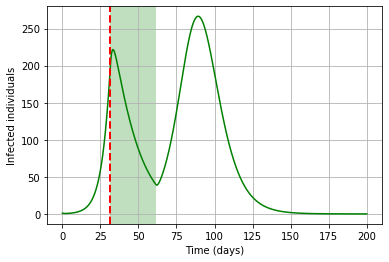

In [4]:
plt.plot(time, I_Q, 'g-')
plt.axvline(x = Q_start, linewidth=2, color='r', ls='--')

plt.axvspan(Q_start, Q_stop, facecolor='g', alpha=0.25)

plt.xlabel('Time (days)')
plt.ylabel('Infected individuals')
plt.grid()
plt.show()

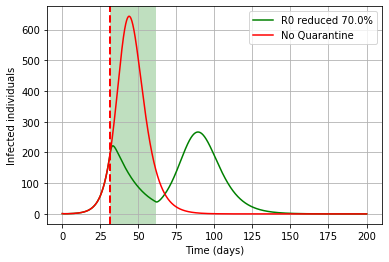

In [5]:
plt.plot(time, I_Q, 'g-')
plt.plot(time[:int(t_max/dt)+2], I, 'r-')
plt.legend([f"R0 reduced {R_red*100}%", "No Quarantine"], loc='best')
plt.axvline(x = Q_start, linewidth=2, color='r', ls='--')

plt.axvspan(Q_start, Q_stop, facecolor='g', alpha=0.25)

plt.xlabel('Time (days)')
plt.ylabel('Infected individuals')
plt.grid()
plt.show()

## Fitting model to data

In [6]:
import pandas as pd
import numpy as np

# Reading the data from https://covid.saude.gov.br/
df_gov = pd.read_excel('../GovData/HIST_PAINEL_COVIDBR_Mod.xlsx', index_col=None)

# Chosing city
city_name = 'Brasília'

df_city = df_gov.loc[df_gov['municipio'] == city_name]

# Adding days since first notice column
df_city['dias'] = np.arange(len(df_city))

# Saving Cummulative cases and deaths to np.array
cummCases = df_city['casosAcumulado'].to_numpy()

cummDeaths = df_city['obitosAcumulado'].to_numpy()

# len(cummCases)

<ipython-input-6-c7f6c1ea0087>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_city['dias'] = np.arange(len(df_city))


In [7]:
t_eval = np.arange(len(df_city))
city_pop = df_city['populacaoTCU2019'].iloc[0]
print(city_pop)

3015268.0


In [8]:
from lmfit import Model
import matplotlib.pyplot as plt

# Defines functions for this project
from funcs_fit import *

            # Data parameters:
# t_inc (incubation time = 5 days (avg) )
# t_inf (infectious time = 1.61 day (avg) )
# R0 = basic reproduction number (average of individuals infected by an infected individual during infectation)
# R0 approx 2.74

t_inc = 5.0
t_inf = 1.61
R0 = 2.74

            # Equation parameters
# Parameters in F: beta, sigma, gamma

sigma = 1.0/t_inc
gamma = 1.0/t_inf
beta = R0/t_inf

print(40*"=")
print(f"sigma = {sigma}")
print(f"gamma = {gamma}")
print(f"beta = {beta}")
print(f"R0 = {R0}")

            # Simulation parameters
# time parameters given in days
# population can be rescaled depending on location

dt = 0.1
t_max = 30

# Time vector for the whole simulation
time = np.arange(0, t_max, dt)

# eps = 1.0/city_pop
eps = df_city['casosAcumulado'].iloc[0]

xa = np.array([city_pop-eps, 0.0, eps, 0.0])


print(40*'=')
print("Initial population [S, E, I, R] = ", xa)

S, E, I, R = time_loop(time, xa, beta, sigma, gamma)


sigma = 0.2
gamma = 0.6211180124223602
beta = 1.7018633540372672
R0 = 2.74
Initial population [S, E, I, R] =  [3.015008e+06 0.000000e+00 2.600000e+02 0.000000e+00]


[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29.]


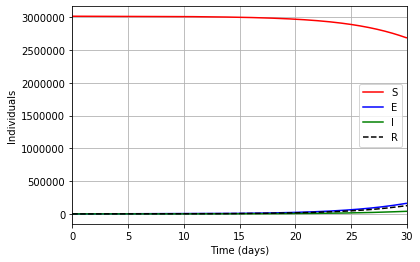

In [9]:
print(time[::10])


time = np.append(time, t_max+dt)
plt.plot(time, S, 'r-')
plt.plot(time, E, 'b-')
plt.plot(time, I, 'g-')
plt.plot(time, R, 'k--')
plt.xlim(0,t_max)
plt.xlabel('Time (days)')
plt.ylabel('Individuals')
plt.grid()
plt.legend(["S", "E", "I", "R"], loc='best')
plt.show()

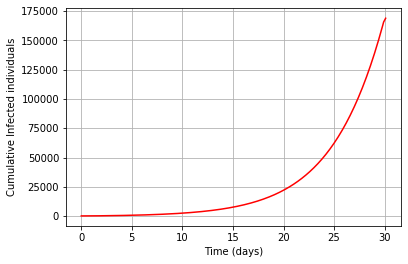

In [10]:
plt.plot(time, I+R, 'r-')
plt.xlabel('Time (days)')
plt.ylabel('Cumulative Infected individuals')
plt.grid()
plt.show()

In [11]:

def sumsq(params):
    beta, sigma, gamma = params

    time = np.arange(0, t_max, dt)
    xa = np.array([city_pop-eps, 0.0, eps, 0.0])
    
    S, E, I, R = time_loop(time, xa, beta, sigma, gamma)
    
    I = I[::10]
    R = R[::10]
    
    I = np.delete(I, len(I)-1)
    R = np.delete(R, len(R)-1)
    
    return(np.sum(( (I+R)- cummCases[:t_max] )**2))

from scipy.optimize import minimize

msol = minimize(sumsq,[1.7, 0.2, 0.62],method='Nelder-Mead')
msol.x


/home/bruno/Documents/COVID-19/python_project/SEIR/funcs_fit.py:16: RuntimeWarning: overflow encountered in double_scalars
  fx[0] = -(beta*x[2]*x[0])/N
/home/bruno/Documents/COVID-19/python_project/SEIR/funcs_fit.py:17: RuntimeWarning: overflow encountered in double_scalars
  fx[1] = (beta*x[2]*x[0])/N - sigma*x[1]
/home/bruno/Documents/COVID-19/python_project/env/lib/python3.8/site-packages/numpy/core/fromnumeric.py:90: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


array([28.59095497,  0.05893694, 21.37256905])

In [12]:
beta_fit, sigma_fit, gamma_fit = msol.x
xa = np.array([city_pop-eps, 0.0, eps, 0.0])

time = np.arange(0, 49, dt)

S_fit, E_fit, I_fit, R_fit = time_loop(time, xa, beta_fit, sigma_fit, gamma_fit)

I_fit = np.delete(I_fit, len(I)-1)
R_fit = np.delete(R_fit, len(R)-1)

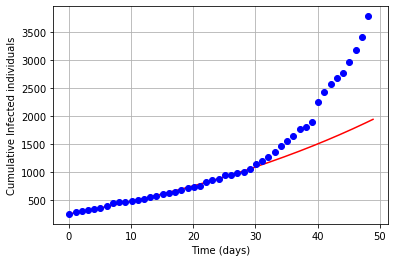

In [13]:

plt.plot(time, I_fit+R_fit, 'r-')
plt.plot(time[1::10], cummCases[:49], 'bo')
plt.xlabel('Time (days)')
plt.ylabel('Cumulative Infected individuals')
plt.grid()
plt.show()

In [14]:
R0 = beta_fit / gamma_fit
print(f"R0 from fit: {R0}")

R0 from fit: 1.3377406760295776
